# Multiplane imaging workflow
Notebook set up as described by babcock et al. [https://storm-analysis.readthedocs.io/en/stable/analysis.html](https://storm-analysis.readthedocs.io/en/stable/analysis.html). 
* starting point is cropped planes from raw camera frames set up in separate folders
* calibration file is created from accent calibration script by ries lab and converted into the appropriate format for this processing




In [1]:
# general imports 
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle
from tkinter import filedialog
from tkinter import *
import json
from tqdm import tqdm
import csv
from natsort import natsorted

In [2]:
from xml.etree import ElementTree
import storm_analysis.sa_library.sa_h5py as saH5Py

def load_multiplane_calibration(filename):
    if not os.path.exists(filename):
        # ask for user input for calibraiton
        root = Tk()
        root.withdraw()
        filepath = filedialog.askopenfile(title='Select calibration data file', filetypes =[('Calibration file', '*.json')])
        fopen = filepath.name
    else:
        fopen = os.path.join(filename)
    f = open(fopen)
    cal = json.load(f, object_hook=jsonKeys2int) 
    return cal


def jsonKeys2int(x):
    if isinstance(x, dict):
        return {(int(k) if k.isnumeric() else k):v for k,v in x.items()}
    return x


def txt2csv(txtname):
    csvname = txtname.replace(".txt", ".csv")
    with open(txtname, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open(csvname, 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)

    print(f"Finished writing {csvname}")

def hdf5PxlToTxtNm(hdf5_name, txt_name, pixel_size):
    locfields = ['x', 'y', 'z']
    nmfields = [f+"nm" for f in locfields]
    with saH5Py.SAH5Reader(hdf5_name) as h5:
        nm_per_pixel = h5.getPixelSize()
        [movie_x, movie_y, movie_l, hash_value] = h5.getMovieInformation()

        with open(txt_name, "w") as fp:
            has_header = False
            fields = None
            
            # Convert tracks.
            if h5.hasTracks():
                index = 0
                print("Converting tracks.")
                for tracks in tqdm(h5.tracksIterator()):
                    
                    if not has_header:
                        fields = sorted(tracks.keys())
                        fp.write(",".join(["index"] + fields + nmfields) + "\n")
                        has_header = True

                    for i in range(tracks["x"].size):
                        text = [str(index)]
                        cc = {}
                        for field in fields:
                            if(tracks[field].dtype == np.int32):
                                text.append(str(tracks[field][i]))
                            else:
                                text.append("{0:.3f}".format(tracks[field][i]))

                            if field in locfields:
                                cc[field] = tracks[field][i]

                        for k in cc.keys():
                            if(tracks[k].dtype == np.int32):
                                text.append(str(tracks[k][i]*pixel_size))
                            else:
                                text.append("{0:.3f}".format(tracks[k][i]*pixel_size))


                        fp.write(",".join(text) + "\n")
                        index += 1
                        
            # Convert localizations.
            else:
                index = 0
                print("Converting localizations.")
                for fnum, locs in tqdm(h5.localizationsIterator(drift_corrected = False)):
                                        
                    if not has_header:
                        fields = sorted(locs.keys())
                        fp.write(",".join(["index", "frame"] + fields + nmfields) + "\n")
                        has_header = True

                    for i in range(locs["x"].size):
                        text = [str(index),str(fnum)]
                        cc={}
                        for field in fields:
                            if(locs[field].dtype == np.int32):
                                text.append(str(locs[field][i]))
                            else:
                                text.append("{0:.3f}".format(locs[field][i]))

                            if field in locfields:
                                cc[field] = locs[field][i]

                        for k in cc.keys():
                            if(locs[k].dtype == np.int32):
                                text.append(str(locs[k][i]*pixel_size))
                            else:
                                text.append("{0:.3f}".format(locs[k][i]*pixel_size))
                                
                        fp.write(",".join(text) + "\n")
                        index += 1


In [3]:
from xml.etree import ElementTree
import storm_analysis.sa_library.sa_h5py as saH5Py

def load_multiplane_calibration(filename):
    if not os.path.exists(filename):
        # ask for user input for calibraiton
        root = Tk()
        root.withdraw()
        filepath = filedialog.askopenfile(title='Select calibration data file', filetypes =[('Calibration file', '*.json')])
        fopen = filepath.name
    else:
        fopen = os.path.join(filename)
    f = open(fopen)
    cal = json.load(f, object_hook=jsonKeys2int) 
    return cal


def jsonKeys2int(x):
    if isinstance(x, dict):
        return {(int(k) if k.isnumeric() else k):v for k,v in x.items()}
    return x


def txt2csv(txtname):
    csvname = txtname.replace(".txt", ".csv")
    with open(txtname, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open(csvname, 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)

    print(f"Finished writing {csvname}")

def hdf5PxlToTxtNm(hdf5_name, txt_name, pixel_size):
    locfields = ['x', 'y', 'z']
    nmfields = [f+"nm" for f in locfields]
    with saH5Py.SAH5Reader(hdf5_name) as h5:
        nm_per_pixel = h5.getPixelSize()
        [movie_x, movie_y, movie_l, hash_value] = h5.getMovieInformation()

        with open(txt_name, "w") as fp:
            has_header = False
            fields = None
            
            # Convert tracks.
            if h5.hasTracks():
                index = 0
                print("Converting tracks.")
                for tracks in tqdm(h5.tracksIterator()):
                    
                    if not has_header:
                        fields = sorted(tracks.keys())
                        fp.write(",".join(["index"] + fields + nmfields) + "\n")
                        has_header = True

                    for i in range(tracks["x"].size):
                        text = [str(index)]
                        cc = {}
                        for field in fields:
                            if(tracks[field].dtype == np.int32):
                                text.append(str(tracks[field][i]))
                            else:
                                text.append("{0:.3f}".format(tracks[field][i]))

                            if field in locfields:
                                cc[field] = tracks[field][i]

                        for k in cc.keys():
                            if(tracks[k].dtype == np.int32):
                                text.append(str(tracks[k][i]*pixel_size))
                            else:
                                text.append("{0:.3f}".format(tracks[k][i]*pixel_size))


                        fp.write(",".join(text) + "\n")
                        index += 1
                        
            # Convert localizations.
            else:
                index = 0
                print("Converting localizations.")
                for fnum, locs in tqdm(h5.localizationsIterator(drift_corrected = False)):
                                        
                    if not has_header:
                        fields = sorted(locs.keys())
                        fp.write(",".join(["index", "frame"] + fields + nmfields) + "\n")
                        has_header = True

                    for i in range(locs["x"].size):
                        text = [str(index),str(fnum)]
                        cc={}
                        for field in fields:
                            if(locs[field].dtype == np.int32):
                                text.append(str(locs[field][i]))
                            else:
                                text.append("{0:.3f}".format(locs[field][i]))

                            if field in locfields:
                                cc[field] = locs[field][i]

                        for k in cc.keys():
                            if(locs[k].dtype == np.int32):
                                text.append(str(locs[k][i]*pixel_size))
                            else:
                                text.append("{0:.3f}".format(locs[k][i]*pixel_size))
                                
                        fp.write(",".join(text) + "\n")
                        index += 1


Load and display parameter and calibration files 

In [4]:
root=r"F:\moritz\babcock_test\8plane"
os.chdir(root)
print(os.getcwd())

script_root = r'E:\GitHub\storm-analysis\storm_analysis'

filepath_mcal = os.path.join(root, 'cal.json')
#mcal = load_multiplane_calibration(filepath_mcal)
# create mcal based on simulation parameters 
mcal = {'psf_slices' : 50, 
        'dz_stage' : 10, 
        'steps' : 600,
        'fp' : [510, 450, 390, 330, 270, 210, 150, 90]
}

#filepath_scmos_cal1 = os.path.join(root, 'cal.json')
#filepath_scmos_cal2 = 
analysis_params = 'single_plane_daofit.xml'
zcal_fit_params = 'zcal.xml'
#filepath_analysis_params = os.path.join(root, analysis_params)

# processing parameters
global ref_plane, exp_time, pixel_size, camera_gain, camera_offset, iterations, dz, focus_plane, threshold
ref_plane = 0 # python indexing
exp_time = 10
pixel_size = 108
camera_gain = 5
camera_offset = 100
iterations = 1000
model = '2dfixed'
dz = 50
threshold = 16
focus_plane = int(mcal['psf_slices']/2)
spline_z_range = int(0.5*mcal['steps'])*int(mcal['dz_stage'])/1000

F:\moritz\babcock_test\8plane


In [5]:
import storm_analysis.sa_library.parameters as parameters
def createParametersFile(max_frame, start_frame, filename, roi_size=15):
    """
    Create a 3D-DAOSTORM parameters file.
    """
    params = parameters.ParametersDAO()

    params.setAttr("max_frame", "int", max_frame)    
    params.setAttr("start_frame", "int", start_frame)
    
    params.setAttr("background_sigma", "float", 8.0)
    params.setAttr("camera_gain", "float", camera_gain)
    params.setAttr("camera_offset", "float", camera_offset)
    params.setAttr("find_max_radius", "int", 5)
    params.setAttr("foreground_sigma", "float", 3.0)
    params.setAttr("iterations", "int", iterations)
    params.setAttr("model", "string", model)
    params.setAttr("pixel_size", "float", pixel_size)
    params.setAttr("roi_size", "int", roi_size)
    params.setAttr("sigma", "float", 3)
    params.setAttr("threshold", "float", threshold)

    params.setAttr("no_fitting", "int", 0)

    # Z fitting.
    params.setAttr("do_zfit", "int", 0)

    params.setAttr("cutoff", "float", 0.0)    
    params.setAttr("max_z", "float", 0.5)
    params.setAttr("min_z", "float", -0.5)
    params.setAttr("z_value", "float", 0.0)
    params.setAttr("z_step", "float", 0.001)

    params.setAttr("wx_wo", "float", 300.0)
    params.setAttr("wx_c", "float", 150.0)
    params.setAttr("wx_d", "float", 400.0)
    params.setAttr("wxA", "float", 0.0)
    params.setAttr("wxB", "float", 0.0)
    params.setAttr("wxC", "float", 0.0)
    params.setAttr("wxD", "float", 0.0)

    params.setAttr("wy_wo", "float", 300.0)
    params.setAttr("wy_c", "float", -150.0)
    params.setAttr("wy_d", "float", 400.0)
    params.setAttr("wyA", "float", 0.0)
    params.setAttr("wyB", "float", 0.0)
    params.setAttr("wyC", "float", 0.0)
    params.setAttr("wyD", "float", 0.0)

    # Do tracking.
    params.setAttr("descriptor", "string", "1")
    params.setAttr("radius", "float", "0.5")

    # Do drift-correction.
    params.setAttr("d_scale", "int", 2)
    params.setAttr("drift_correction", "int", 0)
    params.setAttr("frame_step", "int", 500)
    params.setAttr("z_correction", "int", 0)
    
    params.toXMLFile(filename)


createParametersFile(max_frame=focus_plane+1, start_frame=focus_plane, filename=analysis_params, roi_size=25)

createParametersFile(max_frame=-1, start_frame=-1, filename=zcal_fit_params, roi_size=25)

In [ ]:
# create analysis files for each plane with respective focal plane
for i, fp in enumerate(mcal['fp']):
    param_fname = analysis_params.replace('.', f'_{i}.' )
    createParametersFile(max_frame=fp+1, start_frame=fp, filename=param_fname, roi_size=17)

### daostorm fitting of bead stack focal planes for marker ID in .hd5f

In [52]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
#from storm_analysis.sa_utilities. hdf5_to_image import render2DImage
import storm_analysis.jupyter_examples.overlay_image as overlay_image

#base_pattern = r'beads_zcal_ch(\d+)\.tif'
base_pattern = r'c(\d+)\_zcal.dax'
focal_planes_list = [f for f in os.listdir(root) if re.match(base_pattern, f)]

In [ ]:
for i, f in enumerate(focal_planes_list):
    id_group = re.match(base_pattern, f)
    outname = f'locs_plane_{int(id_group.group(1))}.hdf5'

    # development
    if os.path.isfile(os.path.join(root, outname)):
        os.remove(os.path.join(root, outname))

    param_fname = analysis_params.replace('.', f'_{i}.' )
    analyze(f, outname, param_fname)
    print(f"Written focal plane locs of z-plane {id_group.group(1)}")
    #plt.imshow(render2DImage(outname))
    #plt.show()
    overlay_image.overlayImage(f, outname, mcal['fp'][i])
    


### micrometry mapping of .hd5f locs from focal planes for transforms

In [44]:
from storm_analysis.micrometry.micrometry import runMicrometry
marker_pattern = r'locs_plane_(\d+)\.hdf5'
plane_locs_list = [f for f in os.listdir(root) if re.match(marker_pattern, f)]

plane_locs_list

['locs_plane_1.hdf5',
 'locs_plane_2.hdf5',
 'locs_plane_3.hdf5',
 'locs_plane_4.hdf5',
 'locs_plane_5.hdf5',
 'locs_plane_6.hdf5',
 'locs_plane_7.hdf5',
 'locs_plane_8.hdf5']

Using ref: locs_plane_1.hdf5, target locs_plane_2.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2200 quads

Comparing quads.
Match 0 0.99 1.67e-05 10.99
Match 1 0.30 1.67e-05 9.79
Match 2 0.42 1.67e-05 10.13
Match 3 0.29 1.67e-05 9.75
Match 4 0.31 1.67e-05 9.82
Match 5 0.39 1.67e-05 10.05
Match 6 0.38 1.67e-05 10.03
Match 7 0.25 1.67e-05 9.60
Match 8 0.44 1.67e-05 10.18
Match 9 0.33 1.67e-05 9.89
Match 10 0.29 1.67e-05 9.78
Match 11 0.44 1.67e-05 10.17
Match 12 0.37 1.67e-05 10.01
Match 13 0.39 1.67e-05 10.07
Match 14 0.22 1.67e-05 9.50
Match 15 0.37 1.67e-05 10.01
Match 16 0.33 1.67e-05 9.88
Match 17 0.42 1.67e-05 10.14
Match 18 0.54 1.67e-05 10.39
Match 19 0.72 1.67e-05 10.68
Match 20 0.99 1.67e-05 10.99
Match 21 0.32 1.67e-05 9.87
Match 22 0.48 1.67e-05 10.26
Match 23 0.44 1.67e-05 10.19
Match 24 0.51 1.67e-05 10.33
Match 25 0.43 1.67e-05 10.16
Match 26 0.42 1.67e-05 10.13
Match 27 0.33 1.67e-05 9.89
Match 28 0.27 1.67e-0

d:\.anaconda\envs\mp_smlm\Lib\site-packages\storm_analysis-2.2-py3.12.egg\storm_analysis\micrometry\quads.py:181: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return [numpy.linalg.lstsq(m, x)[0],
d:\.anaconda\envs\mp_smlm\Lib\site-packages\storm_analysis-2.2-py3.12.egg\storm_analysis\micrometry\quads.py:182: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  numpy.linalg.lstsq(m, y)[0]]


Match 458 0.55 1.67e-05 10.41
Match 459 0.78 1.67e-05 10.76
Match 460 0.31 1.67e-05 9.82
Match 461 1.00 1.67e-05 11.00
Match 462 0.40 1.67e-05 10.09
Match 463 0.32 1.67e-05 9.86
Match 464 0.68 1.67e-05 10.62
Match 465 0.29 1.67e-05 9.77
Match 466 0.35 1.67e-05 9.94
Match 467 0.34 1.67e-05 9.93
Match 468 0.29 1.67e-05 9.78
Match 469 0.31 1.67e-05 9.83
Match 470 0.30 1.67e-05 9.81
Match 471 0.28 1.67e-05 9.72
Match 472 0.57 1.67e-05 10.44
Match 473 0.50 1.67e-05 10.32
Match 474 0.50 1.67e-05 10.30
Match 475 0.49 1.67e-05 10.30
Match 476 0.56 1.67e-05 10.42
Match 477 0.54 1.67e-05 10.39
Match 478 0.32 1.67e-05 9.88
Match 479 0.84 1.67e-05 10.83
Match 480 0.25 1.67e-05 9.63
Match 481 0.29 1.67e-05 9.75
Match 482 0.33 1.67e-05 9.88
Match 483 0.24 1.67e-05 9.59
Match 484 0.32 1.67e-05 9.87
Match 485 0.56 1.67e-05 10.42
Match 486 0.29 1.67e-05 9.76
Match 487 0.84 1.67e-05 10.83
Match 488 1.00 1.67e-05 11.00
Match 489 0.68 1.67e-05 10.62
Match 490 0.56 1.67e-05 10.42
Match 491 0.50 1.67e-05 10

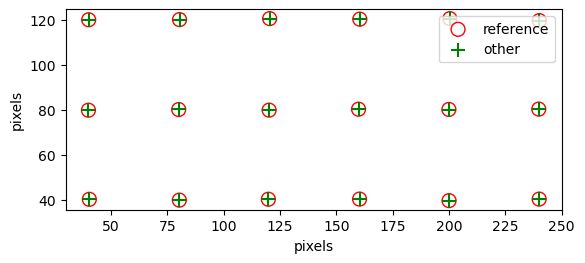

Written mapping: c0_c2.map
Using ref: locs_plane_1.hdf5, target locs_plane_3.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2193 quads

Comparing quads.
Match 0 1.00 1.67e-05 11.00
Match 1 0.30 1.67e-05 9.80
Match 2 0.42 1.67e-05 10.12
Match 3 0.29 1.67e-05 9.76
Match 4 0.31 1.67e-05 9.81
Match 5 0.39 1.67e-05 10.06
Match 6 0.38 1.67e-05 10.04
Match 7 0.25 1.67e-05 9.60
Match 8 0.43 1.67e-05 10.17
Match 9 0.33 1.67e-05 9.89
Match 10 0.30 1.67e-05 9.78
Match 11 0.44 1.67e-05 10.19
Match 12 0.37 1.67e-05 10.01
Match 13 0.39 1.67e-05 10.06
Match 14 0.22 1.67e-05 9.50
Match 15 0.37 1.67e-05 10.01
Match 16 0.33 1.67e-05 9.91
Match 17 0.42 1.67e-05 10.15
Match 18 0.54 1.67e-05 10.38
Match 19 0.73 1.67e-05 10.69
Match 20 1.00 1.67e-05 11.00
Match 21 0.32 1.67e-05 9.87
Match 22 0.49 1.67e-05 10.29
Match 23 0.45 1.67e-05 10.20
Match 24 0.51 1.67e-05 10.33
Match 25 0.43 1.67e-05 10.15
Match 26 0.42 1.67e-05 10.13
Match 27 0.33 1.67e-05

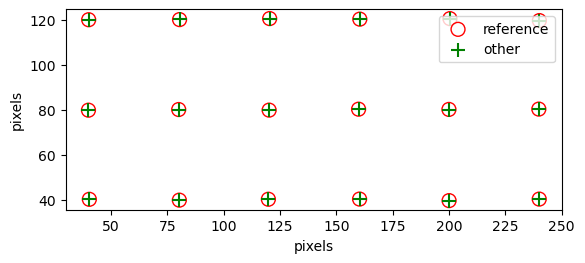

Written mapping: c0_c3.map
Using ref: locs_plane_1.hdf5, target locs_plane_4.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2179 quads

Comparing quads.
Match 0 1.00 1.67e-05 11.00
Match 1 0.30 1.67e-05 9.79
Match 2 0.41 1.67e-05 10.12
Match 3 0.30 1.67e-05 9.81
Match 4 0.39 1.67e-05 10.06
Match 5 0.25 1.67e-05 9.60
Match 6 0.43 1.67e-05 10.15
Match 7 0.33 1.67e-05 9.88
Match 8 0.30 1.67e-05 9.79
Match 9 0.44 1.67e-05 10.17
Match 10 0.37 1.67e-05 10.00
Match 11 0.39 1.67e-05 10.06
Match 12 0.22 1.67e-05 9.50
Match 13 0.41 1.67e-05 10.11
Match 14 0.37 1.67e-05 10.00
Match 15 0.33 1.67e-05 9.91
Match 16 0.43 1.67e-05 10.15
Match 17 0.53 1.67e-05 10.36
Match 18 0.75 1.67e-05 10.71
Match 19 1.00 1.67e-05 11.00
Match 20 0.32 1.67e-05 9.86
Match 21 0.50 1.67e-05 10.31
Match 22 0.45 1.67e-05 10.20
Match 23 0.51 1.67e-05 10.33
Match 24 0.43 1.67e-05 10.16
Match 25 0.41 1.67e-05 10.12
Match 26 0.33 1.67e-05 9.89
Match 27 0.28 1.67e-05

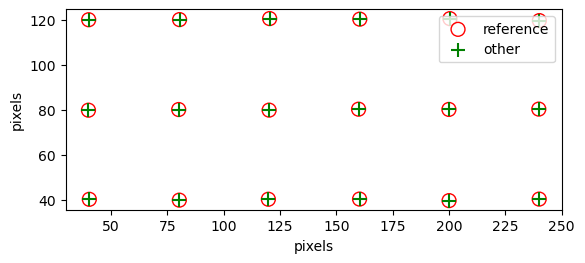

Written mapping: c0_c4.map
Using ref: locs_plane_1.hdf5, target locs_plane_5.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2188 quads

Comparing quads.
Match 0 1.00 1.67e-05 11.00
Match 1 0.30 1.67e-05 9.79
Match 2 0.41 1.67e-05 10.12
Match 3 0.30 1.67e-05 9.81
Match 4 0.39 1.67e-05 10.07
Match 5 0.38 1.67e-05 10.04
Match 6 0.25 1.67e-05 9.61
Match 7 0.43 1.67e-05 10.17
Match 8 0.33 1.67e-05 9.88
Match 9 0.30 1.67e-05 9.80
Match 10 0.44 1.67e-05 10.18
Match 11 0.37 1.67e-05 10.01
Match 12 0.39 1.67e-05 10.07
Match 13 0.22 1.67e-05 9.50
Match 14 0.69 1.67e-05 10.63
Match 15 0.41 1.67e-05 10.11
Match 16 0.37 1.67e-05 10.00
Match 17 0.33 1.67e-05 9.90
Match 18 0.42 1.67e-05 10.14
Match 19 0.54 1.67e-05 10.38
Match 20 1.00 1.67e-05 11.00
Match 21 0.32 1.67e-05 9.87
Match 22 0.50 1.67e-05 10.31
Match 23 0.45 1.67e-05 10.20
Match 24 0.51 1.67e-05 10.33
Match 25 0.43 1.67e-05 10.16
Match 26 0.41 1.67e-05 10.11
Match 27 0.33 1.67e-0

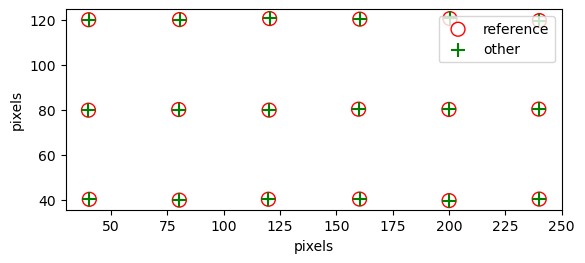

Written mapping: c0_c5.map
Using ref: locs_plane_1.hdf5, target locs_plane_6.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2197 quads

Comparing quads.
Match 0 0.99 1.67e-05 10.99
Match 1 0.30 1.67e-05 9.80
Match 2 0.43 1.67e-05 10.15
Match 3 0.30 1.67e-05 9.81
Match 4 0.38 1.67e-05 10.04
Match 5 0.25 1.67e-05 9.60
Match 6 0.43 1.67e-05 10.17
Match 7 0.33 1.67e-05 9.89
Match 8 0.29 1.67e-05 9.78
Match 9 0.44 1.67e-05 10.19
Match 10 0.37 1.67e-05 10.01
Match 11 0.39 1.67e-05 10.06
Match 12 0.22 1.67e-05 9.50
Match 13 0.42 1.67e-05 10.14
Match 14 0.36 1.67e-05 9.99
Match 15 0.33 1.67e-05 9.90
Match 16 0.43 1.67e-05 10.15
Match 17 0.52 1.67e-05 10.35
Match 18 0.74 1.67e-05 10.70
Match 19 1.00 1.67e-05 11.00
Match 20 0.32 1.67e-05 9.86
Match 21 0.48 1.67e-05 10.27
Match 22 0.45 1.67e-05 10.20
Match 23 0.52 1.67e-05 10.35
Match 24 0.43 1.67e-05 10.17
Match 25 0.41 1.67e-05 10.11
Match 26 0.33 1.67e-05 9.89
Match 27 0.27 1.67e-05 

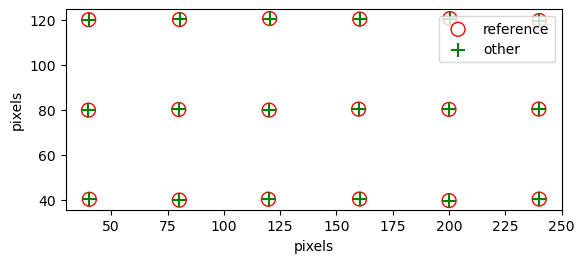

Written mapping: c0_c6.map
Using ref: locs_plane_1.hdf5, target locs_plane_7.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2182 quads

Comparing quads.
Match 0 1.00 1.67e-05 11.00
Match 1 0.30 1.67e-05 9.79
Match 2 0.43 1.67e-05 10.15
Match 3 0.31 1.67e-05 9.82
Match 4 0.39 1.67e-05 10.07
Match 5 0.39 1.67e-05 10.05
Match 6 0.25 1.67e-05 9.61
Match 7 0.43 1.67e-05 10.16
Match 8 0.33 1.67e-05 9.88
Match 9 0.30 1.67e-05 9.79
Match 10 0.44 1.67e-05 10.18
Match 11 0.37 1.67e-05 10.01
Match 12 0.39 1.67e-05 10.07
Match 13 0.22 1.67e-05 9.50
Match 14 0.42 1.67e-05 10.12
Match 15 0.37 1.67e-05 10.01
Match 16 0.33 1.67e-05 9.89
Match 17 0.43 1.67e-05 10.15
Match 18 0.54 1.67e-05 10.38
Match 19 0.76 1.67e-05 10.73
Match 20 0.99 1.67e-05 10.99
Match 21 0.32 1.67e-05 9.87
Match 22 0.50 1.67e-05 10.31
Match 23 0.45 1.67e-05 10.20
Match 24 0.53 1.67e-05 10.36
Match 25 0.44 1.67e-05 10.18
Match 26 0.42 1.67e-05 10.13
Match 27 0.33 1.67e-0

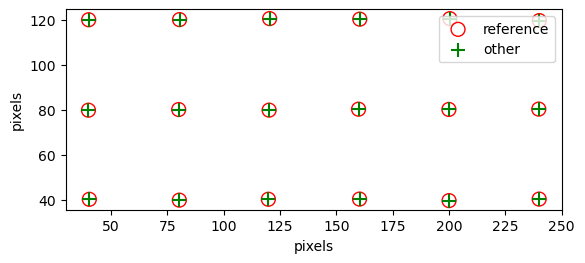

Written mapping: c0_c7.map
Using ref: locs_plane_1.hdf5, target locs_plane_8.hdf5 
Making quads for the 'reference' data.
Created 2190 quads

Making quads for the 'other' data.
Created 2188 quads

Comparing quads.
Match 0 0.99 1.67e-05 10.99
Match 1 0.30 1.67e-05 9.79
Match 2 0.41 1.67e-05 10.12
Match 3 0.29 1.67e-05 9.75
Match 4 0.30 1.67e-05 9.81
Match 5 0.38 1.67e-05 10.04
Match 6 0.38 1.67e-05 10.04
Match 7 0.25 1.67e-05 9.60
Match 8 0.43 1.67e-05 10.16
Match 9 0.33 1.67e-05 9.89
Match 10 0.30 1.67e-05 9.79
Match 11 0.45 1.67e-05 10.20
Match 12 0.37 1.67e-05 10.01
Match 13 0.39 1.67e-05 10.07
Match 14 0.22 1.67e-05 9.50
Match 15 0.37 1.67e-05 10.01
Match 16 0.32 1.67e-05 9.87
Match 17 0.43 1.67e-05 10.15
Match 18 0.54 1.67e-05 10.39
Match 19 0.74 1.67e-05 10.70
Match 20 0.97 1.67e-05 10.98
Match 21 0.32 1.67e-05 9.87
Match 22 0.47 1.67e-05 10.25
Match 23 0.32 1.67e-05 9.86
Match 24 0.44 1.67e-05 10.18
Match 25 0.51 1.67e-05 10.32
Match 26 0.43 1.67e-05 10.17
Match 27 0.41 1.67e-05 

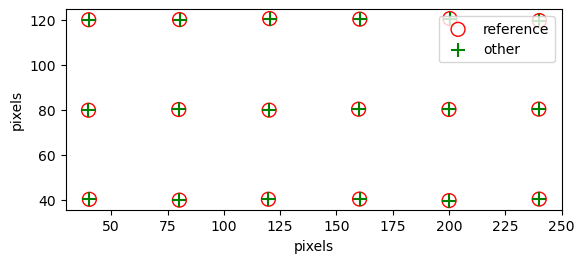

Written mapping: c0_c8.map


In [45]:
maps_list = []
for idx, f in enumerate(plane_locs_list):
    if idx == ref_plane: 
        continue 
    id_group = re.match(marker_pattern, f)
    outname = f'c{ref_plane}_c{int(id_group.group(1))}.map'
    maps_list.append(outname)

    print(f'Using ref: {plane_locs_list[ref_plane]}, target {f} ')
    runMicrometry(plane_locs_list[ref_plane], f, outname, max_size=300)
    print(f"Written mapping: {outname}")

### Merge mappings

In [46]:
# print mappings
print(f"Maps list: {maps_list}")
for f in maps_list:
    with open(f, "rb") as fp:
        a_map = pickle.load(fp)

    print(f)
    for elt in sorted(a_map):
        print(elt, a_map[elt])
    print()

Maps list: ['c0_c2.map', 'c0_c3.map', 'c0_c4.map', 'c0_c5.map', 'c0_c6.map', 'c0_c7.map', 'c0_c8.map']
c0_c2.map
0_1_x [2.00102859e+00 9.99911161e-01 2.02728873e-04]
0_1_y [4.97668394e+00 1.62134802e-04 9.99981819e-01]
1_0_x [-2.00014407e+00  1.00008888e+00 -2.03261003e-04]
1_0_y [-4.97641439e+00 -1.62151289e-04  1.00001787e+00]

c0_c3.map
0_1_x [1.98341009e+00 1.00015563e+00 1.11415481e-05]
0_1_y [ 5.00879802e+00 -1.49009296e-05  9.99947727e-01]
1_0_x [-1.98304363e+00  9.99844372e-01 -1.11377477e-05]
1_0_y [-5.00908984e+00  1.49042395e-05  1.00005227e+00]

c0_c4.map
0_1_x [1.99680806e+00 9.99992109e-01 5.95272375e-05]
0_1_y [4.99976092e+00 8.38320258e-05 9.99869678e-01]
1_0_x [-1.99649257e+00  1.00000785e+00 -5.98159538e-05]
1_0_y [-5.00020482e+00 -8.39026427e-05  1.00013001e+00]

c0_c5.map
0_1_x [1.99101719e+00 1.00000084e+00 1.19946347e-04]
0_1_y [ 5.05183782e+00 -1.85405841e-04  9.99532702e-01]
1_0_x [-1.99040023e+00  9.99999130e-01 -1.20091061e-04]
1_0_y [-5.05455985e+00  1.854812

In [47]:
from storm_analysis.micrometry.merge_maps import mergeMaps 

merged_map = mergeMaps(maps_list)
#same_maps_list = [f'c1_c1.map']*7
#merged_map = mergeMaps(same_maps_list)

map_name = 'merged_map.map'
with open(map_name, 'wb') as fp:
        pickle.dump(merged_map, fp)

print(f"Finished writing merged map: {map_name}")
print(merged_map)

Finished writing merged map: merged_map.map
{'0_1_x': array([2.00102859e+00, 9.99911161e-01, 2.02728873e-04]), '0_1_y': array([4.97668394e+00, 1.62134802e-04, 9.99981819e-01]), '1_0_x': array([-2.00014407e+00,  1.00008888e+00, -2.03261003e-04]), '1_0_y': array([-4.97641439e+00, -1.62151289e-04,  1.00001787e+00]), '0_2_x': array([1.98341009e+00, 1.00015563e+00, 1.11415481e-05]), '0_2_y': array([ 5.00879802e+00, -1.49009296e-05,  9.99947727e-01]), '2_0_x': array([-1.98304363e+00,  9.99844372e-01, -1.11377477e-05]), '2_0_y': array([-5.00908984e+00,  1.49042395e-05,  1.00005227e+00]), '0_3_x': array([1.99680806e+00, 9.99992109e-01, 5.95272375e-05]), '0_3_y': array([4.99976092e+00, 8.38320258e-05, 9.99869678e-01]), '3_0_x': array([-1.99649257e+00,  1.00000785e+00, -5.98159538e-05]), '3_0_y': array([-5.00020482e+00, -8.39026427e-05,  1.00013001e+00]), '0_4_x': array([1.99101719e+00, 1.00000084e+00, 1.19946347e-04]), '0_4_y': array([ 5.05183782e+00, -1.85405841e-04,  9.99532702e-01]), '4_0_x'

### Measuring the PSF
1) Select good beads from focal plane in a single stack from the ref plane > beads_zcal_ch1.hdf5
2) Select good localizations to use for PSF determination for each channel.
python path/to/psf_localizations.py --bin beads_zcal_ch1.hdf5 --map map.map --aoi_size 12
3) Create averaged z stacks for each channel.

In [48]:
# Run loc fitter on whole stacks
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.jupyter_examples.multiplane_measure_psf as multiplane_measure_psf

In [ ]:
pattern = base_pattern # r'beads_zcal_ch(\d+)\.tif'
beadstack_list = [f for f in os.listdir(root) if re.match(pattern, f)]
psf_locs_list = []
for f in beadstack_list:
    print('###################################################################################\n')
    print(f"Processing {f}:") 
    id_group = re.match(pattern, f)
    i = int(id_group.group(1))
    whole_stack_locs = f"zcal_ch{i}.hdf5"
    if os.path.exists(whole_stack_locs):
        os.remove(whole_stack_locs)

    analyze(f, whole_stack_locs, zcal_fit_params)

In [49]:
#os.chdir(os.path.join(script_root,'multi_plane'))
#import kg_psflocalization as psf_localizations
#os.chdir(root)

import storm_analysis.multi_plane.psf_localizations as psfLocalizations

### Select good localizations in one of the analyzed frames (frame 100 in this example)

In [50]:

# We specify a minimum localization separation of 24 pixels (2 x aoi_size).
#import storm_analysis.multi_plane.psf_localizations as psf_localizations

#pattern = r'locs_plane_(\d+)\.hdf5'
pattern = r'zcal_ch(\d+)\.hdf5'
plane_locs_list = [f for f in os.listdir(root) if re.match(pattern, f)]
ref_locs= f'zcal_ch{ref_plane+1}.hdf5' # was ref_plane+1
print(f"Using locs as reference: {ref_locs}")
#plane_locs_list = plane_locs_list.remove(ref_locs)

psfLocalizations.psfLocalizations(ref_locs, map_name, frame = mcal['fp'][ref_plane], aoi_size = 14)
#psf_localizations.psfCrossLocalizations(plane_locs_list, frame = mcal['fp'], aoi_size = 12, min_height = 0.0)

Using locs as reference: zcal_ch1.hdf5
Added 18
Added 18
Added 18
Added 18
Added 18
Added 18
Added 18
Added 18
18 localizations were kept out of 18
ch0: 40.35 40.25
ch1: 42.35 45.23
ch2: 42.34 45.26
ch3: 42.35 45.25
ch4: 42.34 45.27
ch5: 42.36 45.24
ch6: 42.37 45.24
ch7: 42.36 45.23

ch0: 80.28 39.83
ch1: 82.28 44.82
ch2: 82.27 44.84
ch3: 82.27 44.83
ch4: 82.27 44.85
ch5: 82.29 44.82
ch6: 82.29 44.83
ch7: 82.29 44.82

ch0: 119.75 40.27
ch1: 121.75 45.27
ch2: 121.75 45.28
ch3: 121.75 45.28
ch4: 121.74 45.29
ch5: 121.76 45.27
ch6: 121.76 45.27
ch7: 121.76 45.27

ch0: 160.29 40.38
ch1: 162.28 45.38
ch2: 162.29 45.38
ch3: 162.28 45.38
ch4: 162.28 45.38
ch5: 162.30 45.37
ch6: 162.29 45.38
ch7: 162.30 45.38

ch0: 199.98 39.59
ch1: 201.97 44.60
ch2: 202.00 44.59
ch3: 201.98 44.60
ch4: 201.98 44.58
ch5: 202.00 44.59
ch6: 201.99 44.59
ch7: 201.99 44.59

ch0: 239.98 40.35
ch1: 241.97 45.37
ch2: 242.00 45.36
ch3: 241.98 45.37
ch4: 241.97 45.34
ch5: 242.00 45.35
ch6: 241.98 45.36
ch7: 241.99 45.36

In [54]:
pattern = base_pattern #r'beads_zcal_ch(\d+)\.tif'
beadstack_list = [f for f in os.listdir(root) if re.match(pattern, f)]
print(beadstack_list)
psf_locs_list = []
for ii, f in enumerate(beadstack_list):
    id_group = re.match(pattern, f)
    i = int(id_group.group(1))
    check_locs = f"zcal_ch{ref_plane+1}_c{i}_psf.hdf5"
    #check_locs = f"beads_zcal_ch{ref_plane}_c{i}_psf.hdf5"
    #check_locs = f"beads_zcal_ch{i}.hdf5"
    psf_locs_list.append(check_locs)
    
    print(f"Channel {i} (frame {int(mcal['psf_slices']/2)})")
    multiplane_measure_psf.overlayImage(f, check_locs, frame_number=int(mcal['fp'][ii]))



[]


In [ ]:
# investigate psf stack visually in imageJ and run xy drift estimation if necessary
from storm_analysis.multi_plane.zstack_xydrift import xyDrift

for f in psf_locs_list:
    [dx, dy] = xyDrift(f)
    print("dx: {0:5f} dy: {1:5f}".format(dx, dy))

In [ ]:
from storm_analysis.multi_plane.psf_zstack import psfZStack  

# needed
pattern = base_pattern #r'beads_zcal_ch(\d+)\.tif'
beadstack_list = [f for f in os.listdir(root) if re.match(pattern, f)]
#psf_locs_list = []

for f, locs in zip(beadstack_list, psf_locs_list):
#for f, locs in zip(beadstack_list, plane_locs_list):
    print(f"Processing {f}:") 
    id_group = re.match(pattern, f)
    i = int(id_group.group(1))
    psf_stack = f'ch{i}_stack'
    psfZStack(f, locs, psf_stack, aoi_size=12)


### default offset file in which all slices are valid for all splines

In [55]:
from storm_analysis.spliner.offset_to_z import offsetToZ 


##### Adjust zrange here to individual focal planes and create zdata for each stack
#z_data = np.arange(start=-0.5*mcal['psf_slices']*mcal['dz_stage']/1000, stop=+0.5*mcal['psf_slices']*mcal['dz_stage']/1000, step= mcal['dz_stage']/1000)
z_data = np.arange(start=-0.5*mcal['steps']*mcal['dz_stage']/1000, stop=+0.5*mcal['steps']*mcal['dz_stage']/1000, step= int(mcal['dz_stage'])/1000)
data = np.ones((z_data.size,4))
data[:,3] = z_data

offset_file = 'offset_z_default.txt'
np.savetxt(offset_file, data)
data[:,3]

array([-3.00000000e+00, -2.99000000e+00, -2.98000000e+00, -2.97000000e+00,
       -2.96000000e+00, -2.95000000e+00, -2.94000000e+00, -2.93000000e+00,
       -2.92000000e+00, -2.91000000e+00, -2.90000000e+00, -2.89000000e+00,
       -2.88000000e+00, -2.87000000e+00, -2.86000000e+00, -2.85000000e+00,
       -2.84000000e+00, -2.83000000e+00, -2.82000000e+00, -2.81000000e+00,
       -2.80000000e+00, -2.79000000e+00, -2.78000000e+00, -2.77000000e+00,
       -2.76000000e+00, -2.75000000e+00, -2.74000000e+00, -2.73000000e+00,
       -2.72000000e+00, -2.71000000e+00, -2.70000000e+00, -2.69000000e+00,
       -2.68000000e+00, -2.67000000e+00, -2.66000000e+00, -2.65000000e+00,
       -2.64000000e+00, -2.63000000e+00, -2.62000000e+00, -2.61000000e+00,
       -2.60000000e+00, -2.59000000e+00, -2.58000000e+00, -2.57000000e+00,
       -2.56000000e+00, -2.55000000e+00, -2.54000000e+00, -2.53000000e+00,
       -2.52000000e+00, -2.51000000e+00, -2.50000000e+00, -2.49000000e+00,
       -2.48000000e+00, -

In [56]:
off = offsetToZ(offset_file, dz = -0.5*mcal['steps']*mcal['dz_stage']/1000, all_valid = True)

offset_z_file = 'offset_z.txt'
np.savetxt(offset_z_file, off)
z_offsets = np.loadtxt(offset_z_file)
print(z_offsets)

[[ 1.   -3.  ]
 [ 1.   -2.99]
 [ 1.   -2.98]
 ...
 [ 1.    2.96]
 [ 1.    2.97]
 [ 1.    2.98]]


Psf stack list: ['ch1_stack.npy', 'ch2_stack.npy', 'ch3_stack.npy', 'ch4_stack.npy', 'ch5_stack.npy', 'ch6_stack.npy', 'ch7_stack.npy', 'ch8_stack.npy']
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane

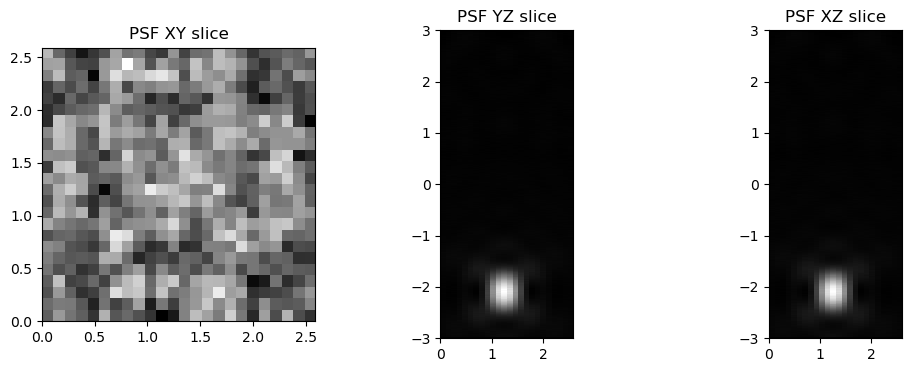

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

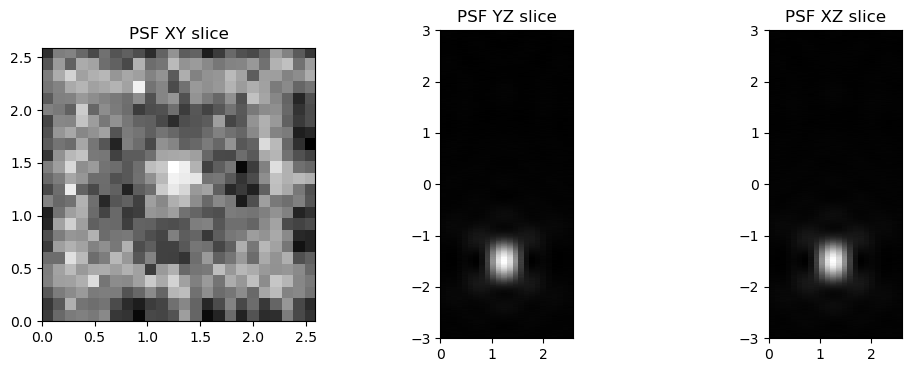

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

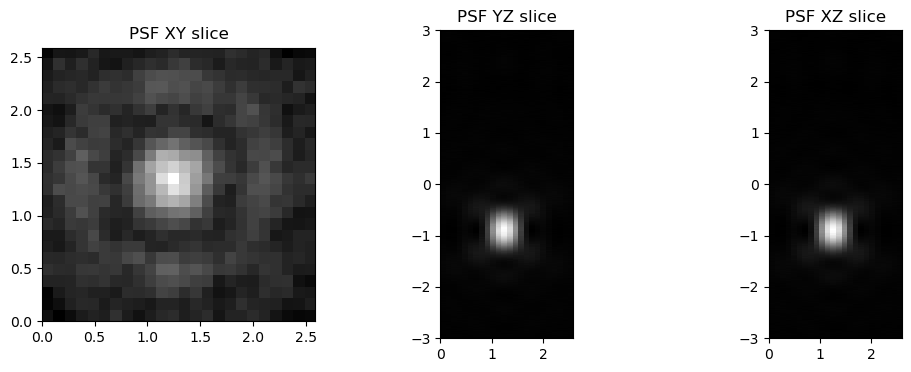

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

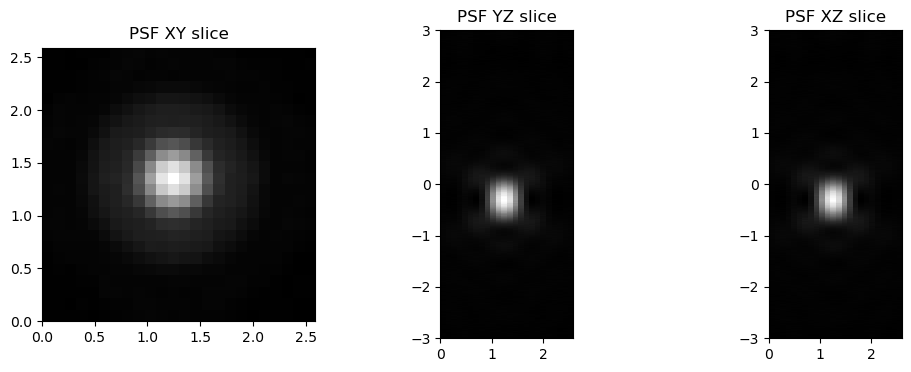

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

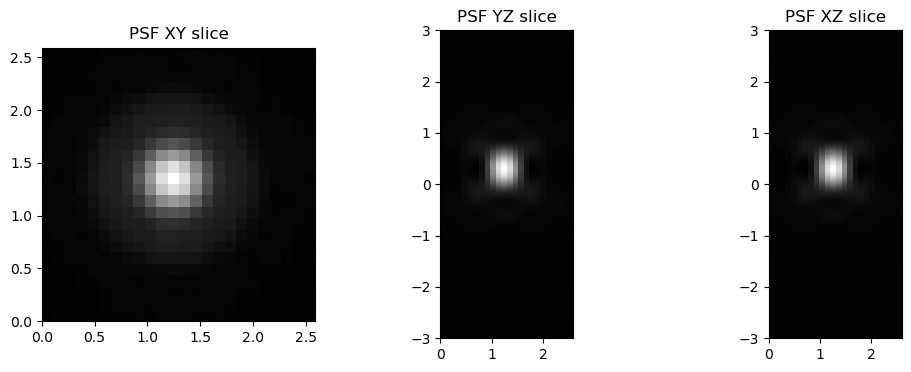

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

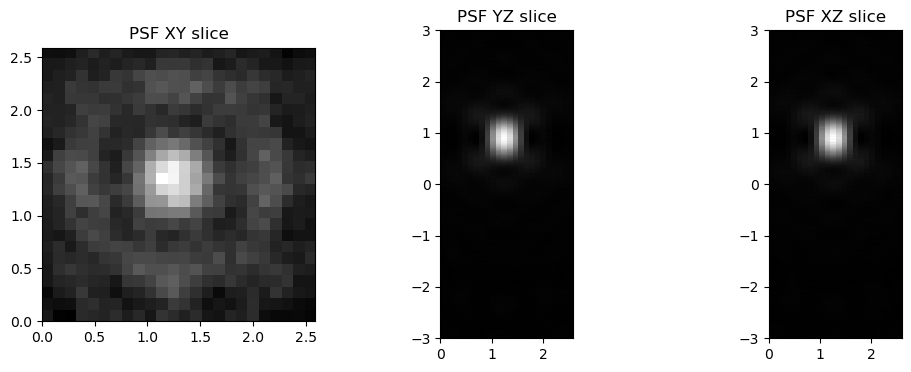

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

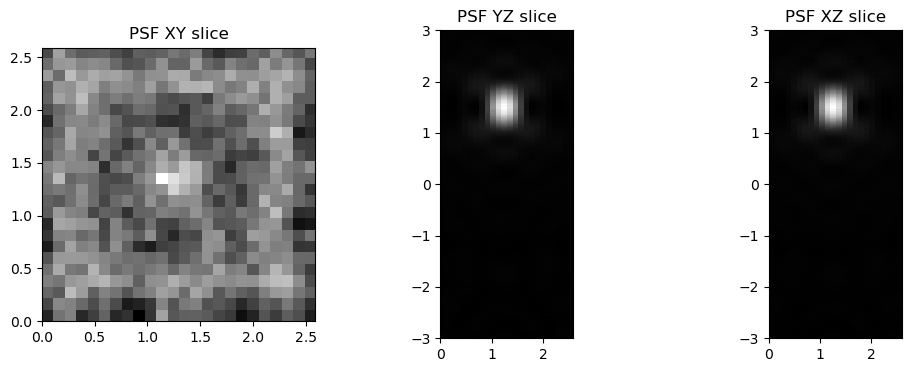

Plots are in microns
z plane 0 has 1 samples
z plane 1 has 1 samples
z plane 2 has 1 samples
z plane 3 has 1 samples
z plane 4 has 1 samples
z plane 5 has 1 samples
z plane 6 has 1 samples
z plane 7 has 1 samples
z plane 8 has 1 samples
z plane 9 has 1 samples
z plane 10 has 1 samples
z plane 11 has 1 samples
z plane 12 has 1 samples
z plane 13 has 1 samples
z plane 14 has 1 samples
z plane 15 has 1 samples
z plane 16 has 1 samples
z plane 17 has 1 samples
z plane 18 has 1 samples
z plane 19 has 1 samples
z plane 20 has 1 samples
z plane 21 has 1 samples
z plane 22 has 1 samples
z plane 23 has 1 samples
z plane 24 has 1 samples
z plane 25 has 1 samples
z plane 26 has 1 samples
z plane 27 has 1 samples
z plane 28 has 1 samples
z plane 29 has 1 samples
z plane 30 has 1 samples
z plane 31 has 1 samples
z plane 32 has 1 samples
z plane 33 has 1 samples
z plane 34 has 1 samples
z plane 35 has 1 samples
z plane 36 has 1 samples
z plane 37 has 1 samples
z plane 38 has 1 samples
z plane 39 has

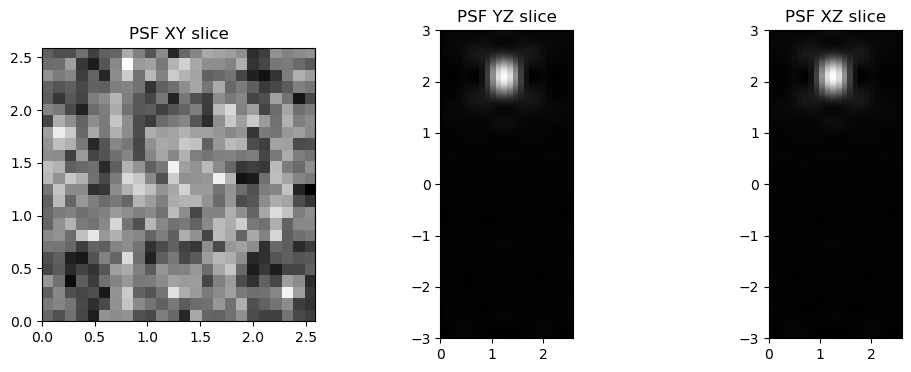

Plots are in microns


In [57]:
from storm_analysis.multi_plane.measure_psf import measurePSF
import storm_analysis.jupyter_examples.psf_images as psfImages

pattern = r'ch(\d+)_stack\.npy' 
psf_stack_list = [f for f in os.listdir(root) if re.match(pattern, f)]
print(f"Psf stack list: {psf_stack_list}")
psf_names = []

#for st, loc in zip(psf_stack_list, psf_locs_list):
for st, loc in zip(psf_stack_list, plane_locs_list):
    idgroup = re.match(pattern, st)
    psf_name = f'ch{idgroup.group(1)}_psf.psf'
    psf_names.append(psf_name)
    
    measurePSF(st, 
               offset_z_file, 
               psf_name,  
                pixel_size = pixel_size * 1.0e-3, 
                z_range = spline_z_range, #0.75 
                z_step = int(mcal['dz_stage'])/1000)

    psfImages.psfImages(psf_name)



### adaptive offset file in which only appropriate psf slices are valid 
* limit valid z slices to +- 1um? of the PSF

In [ ]:
from storm_analysis.spliner.offset_to_z import offsetToZ 
from storm_analysis.multi_plane.measure_psf import measurePSF
import storm_analysis.jupyter_examples.psf_images as psfImages
splice_range = 1800 # nm
##### Adjust zrange here to individual focal planes and create zdata for each stack
z_data = np.arange(start=-0.5*mcal['steps']*np.abs(np.rint(mcal['dz_stage']))/1000, stop=+0.5*mcal['steps']*np.abs(np.rint(mcal['dz_stage']))/1000, step= np.abs(np.rint(mcal['dz_stage']))/1000) # whole stack zdata 

pattern = r'ch(\d+)_stack.npy' 
psf_stack_list = [f for f in os.listdir(root) if re.match(pattern, f)]
print(f"PSF stack list: {psf_stack_list}")
nplanes = len(psf_stack_list)
psf_names = []

#for st, loc in zip(psf_stack_list, plane_locs_list):  # for each psf stack create a z_offset file   
for st in psf_stack_list:  
    idgroup = re.match(pattern, st)
    ix = int(idgroup.group(1))-1  # index of the focal plane in the mcal['fp'] list, needs adjusting for python indexing 

    # select indices that are within the zlim range of the focal plane 
    zlim = [ np.max([mcal['fp'][ix] - int(splice_range/dz), 0]), np.min([mcal['fp'][ix] + int(splice_range/dz), mcal['steps']-1]) ]

    plane_z_data = z_data.copy() # copy whole z_data range for the current focal plane
    # set values outside the zlim range to the center value of that plane so they do no affect the min-max range that is conducted in the offsetToZ function
    plane_z_data[:zlim[0]] = z_data[mcal['fp'][ix]]
    plane_z_data[zlim[1]:] = z_data[mcal['fp'][ix]]

    data = np.ones((z_data.size,4))
    data[:,3] = plane_z_data #z_data

    # create offset file for each stack
    offset_file_raw = f'offset_z_ch{idgroup.group(1)}_raw.txt'
    np.savetxt(offset_file_raw, data)

    dz_offset = (0.5*mcal['steps'] - mcal['fp'][ix]) * mcal['dz_stage']/1000

    off = offsetToZ(offset_file_raw, dz = 0, all_valid = False)
    off[:,1] = z_data[:-1] # overwrite limit range manipulation to use the whole z_data range in display, only valid values are now taken by the psf creation
    offset_z_file = f'offset_z_ch{idgroup.group(1)}.txt'
    np.savetxt(offset_z_file, off)
    z_offsets = np.loadtxt(offset_z_file)
    print(f"Z offsets in {offset_z_file}:")
    print(z_offsets)

    print(f"Processing {st}:")
    # create psf name
    psf_name = f'ch{idgroup.group(1)}_psf.psf'
    psf_names.append(psf_name)

    measurePSF(st, 
            offset_z_file, 
            psf_name,  
            pixel_size = pixel_size * 1.0e-3, 
            z_range = np.rint(0.5*mcal['steps'])*np.abs(np.rint(mcal['dz_stage']))/1000,#  nplanes*splice_range/1000, #0.75 
            z_step = np.abs(np.rint(mcal['dz_stage']))/1000)

    psfImages.psfImages(psf_name)

psf_names

## Normalize PSFs

In [58]:
from storm_analysis.multi_plane.normalize_psfs import normalizePSFs

normalizePSFs(psf_names)
# create filelist
pattern = r'ch(\d+)_psf_normed\.psf' 
psf_names_normed  = [f for f in os.listdir(root) if re.match(pattern, f)]


ch1_psf_normed.psf 0.9969369684935385
ch2_psf_normed.psf 1.0
ch3_psf_normed.psf 0.9974627054116875
ch4_psf_normed.psf 0.9933579487059321
ch5_psf_normed.psf 0.9956854782682178
ch6_psf_normed.psf 0.991633937425292
ch7_psf_normed.psf 0.9902855671213496
ch8_psf_normed.psf 0.9959351533303304


### check plane offsets 
zrange should cover the flanks of the outer PSFs

Plane: 0 maximum at 2110.0nm
Plane: 1 maximum at 1490.0nm
Plane: 2 maximum at 900.0nm
Plane: 3 maximum at 320.0nm
Plane: 4 maximum at -290.0nm
Plane: 5 maximum at -880.0nm
Plane: 6 maximum at -1490.0nm
Plane: 7 maximum at -2110.0nm


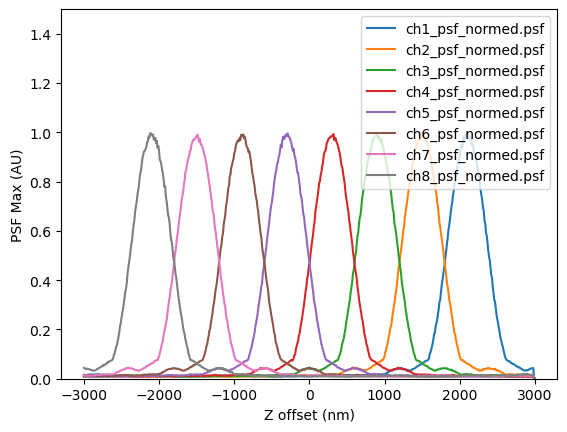

In [74]:
from storm_analysis.multi_plane.check_plane_offsets import checkPlaneOffsets
checkPlaneOffsets(psf_names_normed)


### PSF to spline conversion
check everything beforehand, takes quite some time 

In [60]:
import storm_analysis.spliner.psf_to_spline as psfToSpline

In [61]:
psf_names_spline = []
for f in psf_names_normed:
    spline_name = f.replace('_normed.psf', '.spline') 
    psf_names_spline.append(spline_name)
    
    print(f'Creating spline {spline_name}')
    # 10 is 1/2 the spline size in pixels. This is reasonable value for setups with a camera pixel size of 100nm.    
    psfToSpline.psfToSpline(f, spline_name, 10)

Creating spline ch1_psf.spline
Generating 3D spline.
Generating XY splines.


KeyboardInterrupt: 

### Plane weights
Multiplane uses channel “information” weights in order to more optimally weight the contribution from each plane in the determination of a localizations parameters. The channels are weighted based on their Cramer-Rao bounds as a function of z.

For this step you will need a reasonable estimate of the average background and intensity in the data you plan to analyze. The background is photo-electrons per plane. The signal is the expected average number of photo-electrons per localization summed over all the planes. If your camera does not have a gain of 1.0 you will need to convert camera counts to photo-electrons.

Ideally the analysis would update the Cramer-Rao bounds for each localization as the estimates for the background and intensity change. However as the Cramer-Rao calculation is somewhat computational expensive we forego this step and instead just use average values.

In [94]:
#if psf_names_spline not in locals():
psf_names_spline = [f for f in os.listdir(root) if f.endswith('.spline') and f.startswith('ch')]
psf_names_spline

['ch1_psf.spline',
 'ch2_psf.spline',
 'ch3_psf.spline',
 'ch4_psf.spline',
 'ch5_psf.spline',
 'ch6_psf.spline',
 'ch7_psf.spline',
 'ch8_psf.spline']

In [101]:
# first create final analysis file
import storm_analysis.sa_library.parameters as parameters

def multiplaneXML(spline_names, spline_z_range, z_value, params_name):
    """
    Create a Multiplane parameters object.
    """
    params = parameters.ParametersMultiplaneArb()

    params.setAttr("max_frame", "int", -1)    
    params.setAttr("start_frame", "int", -1)

    #params.setAttr("verbosity", "int", 100) # interval of frames displayed during fitting
    params.setAttr("verbosity", "int", 1) # interval of frames displayed during fitting

    params.setAttr("background_sigma", "float", 9.0)
    #params.setAttr("foreground_sigma", "float", 3.0)
    params.setAttr("find_max_radius", "int", 10)
    params.setAttr("independent_heights", "int", 0) # 1: multicolor spectral demixing, 0: single color
    params.setAttr("iterations", "int", 1) # 20 for regular fitting, 1 for beads to avoid spurious splitting
    params.setAttr("mapping", "filename", "merged_map.map")
    params.setAttr("no_fitting", "int", 0)
    #params.setAttr("roi_size", "int", 35)
    params.setAttr("pixel_size", "float", pixel_size)
    # Convert from FWHM in nanometers to sigma in pixels.
    params.changeAttr("sigma", 380/(100.0 * 2.355))
    #params.setAttr("sigma", "float", 2) # 1.5
    params.setAttr("threshold", "float",18.0) #11.0
    params.setAttr("weights", "filename", "weights.npy")
    params.setAttr("z_value", "float-array", z_value)

    # try from https://storm-analysis.readthedocs.io/_/downloads/en/latest/pdf/ / model parameter
    #params.setAttr("model", "string", "3d") # “2dfixed”, “2d”, “3d”, or “Z”

    for i, f in enumerate(spline_names):
        params.setAttr(f"spline{i}", "filename", f)
        #params.setAttr(f"psf{i}", "filename", f)

        params.setAttr(f"channel{i}_cal", "filename", f"calib.npy")
        #params.setAttr(f"channel{i}_cal", "filename", f"calib_{i}.npy")
        #params.setAttr(f"channel{i}_cal", "filename", f"calib_dummy_{i}.npy")

        #params.setAttr(f"channel{i}_ext", "string", f"pl{i}.tif") # fileextension to define plane
        params.setAttr(f"channel{i}_ext", "string", f"{i+1}_zcal.dax") # fileextension to define plane

        params.setAttr(f"channel{i}_offset", "int", 0)

    # Don't do tracking.
    params.setAttr("descriptor", "string", "1")
    params.setAttr("radius", "float", "0.0")

    params.setAttr("max_z", "float", str(1.2*spline_z_range + 0.001))
    params.setAttr("min_z", "float", str(-(1.2*spline_z_range - 0.001)))

    # Don't do drift-correction.
    params.setAttr("d_scale", "int", 2)
    params.setAttr("drift_correction", "int", 0)
    params.setAttr("frame_step", "int", 500)
    params.setAttr("z_correction", "int", 0)

    # procedural
    #params.setAttr("convert_to ", "string", ".txt")
    #params.setAttr("fftw_estimate  ", "int", 1)
    # assuming EMCCD instead of custom sCMOS calibration
    #params.setAttr("camera_gain", "float", 0.23)
    #params.setAttr("camera_offset", "float", 100.0)

    params.toXMLFile(params_name)


#z_value = '0'
z_planes = [-2.100, -1.500, -0.900, -0.300, 0.300, 0.900, 1.500, 2.100]
#z_planes = z_planes[::-1]

z_value = [str(z) for z in z_planes]
multiplane_params = 'multiplane_analysis.xml'
multiplaneXML(psf_names_spline, np.abs(spline_z_range), z_value, multiplane_params)
#multiplaneXML(psf_names_normed, np.abs(spline_z_range), z_value, multiplane_params)  # with psf stacks instead of spline, need to change params.setAttr(f"spline{i}", "filename", f) to psf{i}


In [102]:
psf_names_spline

['ch1_psf.spline',
 'ch2_psf.spline',
 'ch3_psf.spline',
 'ch4_psf.spline',
 'ch5_psf.spline',
 'ch6_psf.spline',
 'ch7_psf.spline',
 'ch8_psf.spline']

Calculating Cramer-Rao bounds.
z -3000.0
z -2684.2
z -2368.4
z -2052.6
z -1736.8
z -1421.1
z -1105.3
z -789.5
z -473.7
z -157.9
z 157.9
z 473.7
z 789.5
z 1105.3
z 1421.1
z 1736.8
z 2052.6
z 2368.4
z 2684.2
z 3000.0
Correcting for mapping.


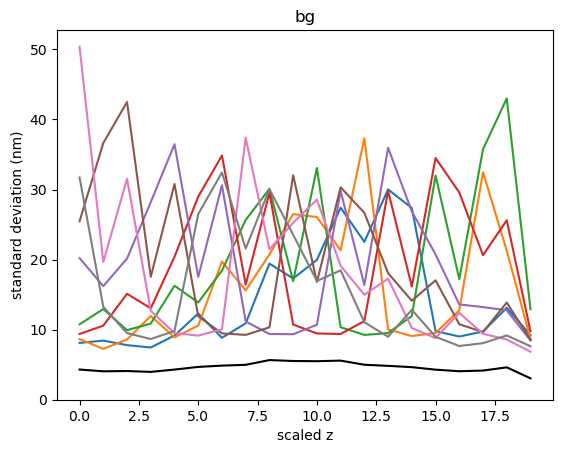

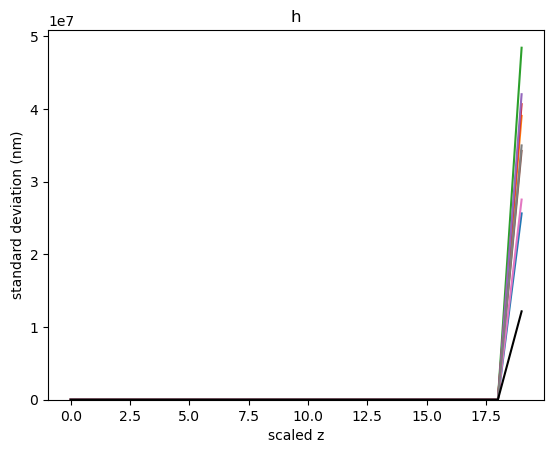

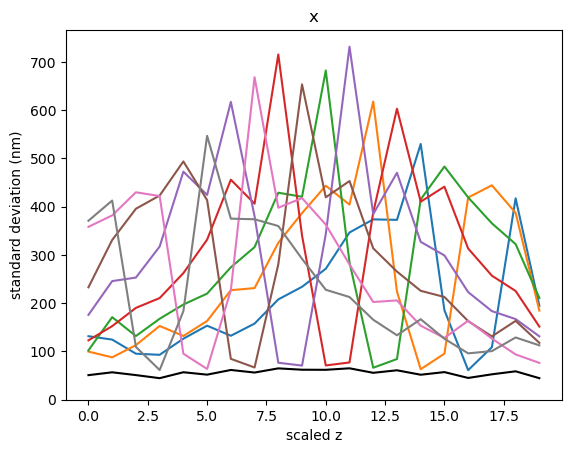

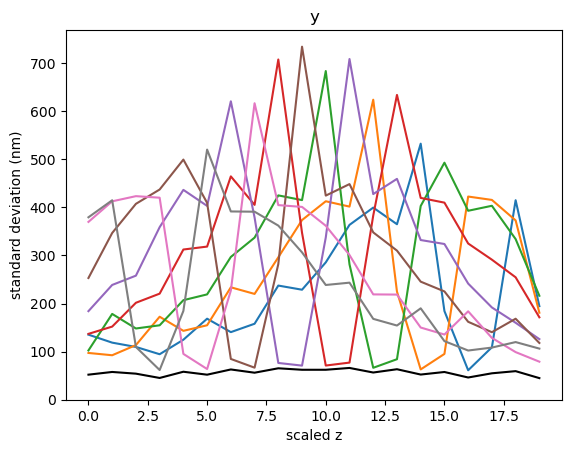

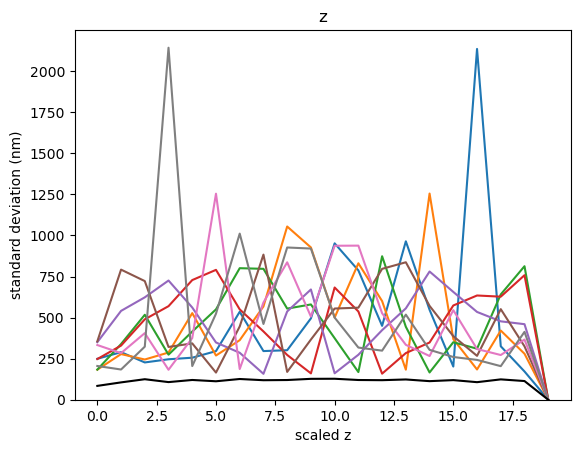

In [103]:
import storm_analysis.multi_plane.plane_weighting as planeWeighting
'''
def runPlaneWeighting(xml, output, background, photons, no_plots = False):
    xml - The analysis XML file.
    output - File name to save the weights in.
    background - Per pixel background in e- for each plane (as a list).
    photons - Integrated peak intensity in e-.
    no_plots - Don't show any plots.
'''
background = [7500 for _ in psf_names_spline]
#background = [200 for _ in psf_names_spline]

planeWeighting.runPlaneWeighting(multiplane_params, 
                                 "weights.npy",
                                 background,   # 20 photons average background in each plane
                                 20000,       # 2000 photon average PSF sum.
                                 no_plots = False)


# Run the analysis

In [10]:
# parse the raw_data filelist
#filekey = r'A1_vim680_silicone_demag2_3_MMStack_Pos0_f(\d+)_'
filekey = r'beads_zcal_(\d+)'


indices = [re.match(filekey, f).group(1) for f in os.listdir(root+r"\data") if re.match(filekey, f)]
indices = natsorted(np.unique(indices))
print(f"Unique file indices: {indices}")

Unique file indices: []


In [ ]:
# batch run all subfiles
import storm_analysis.multi_plane.multi_plane as mp
import storm_analysis.sa_utilities.hdf5_to_txt as txt_conv
import storm_analysis.sa_utilities.hdf5_to_image as img_conv

t = tqdm(total=len(indices), desc="Filename")
subfolder = r"data"

for index in indices:
    basename = filekey.replace(r"(\d+)", index)
    basename_folder = os.path.join(subfolder, basename)
    #mlist_name = f"multiplane_locfit_{index}.hdf5"
    mlist_name = os.path.join(subfolder, f"multiplane_locfit_{index}.hdf5")

    print(f"Processing {basename_folder} to file {mlist_name}")

    mp.analyze(basename_folder, mlist_name, multiplane_params)

    # write loc files to txt
    txtname = mlist_name.replace('.hdf5', '.txt')
    txt_conv.hdf5ToTxt(mlist_name, txtname)

    # convert localisation coordinates from pixel to nm
    txtname = mlist_name.replace('.hdf5', '_pxl2nm.txt')
    print(f"Writing to {txtname}")
    hdf5PxlToTxtNm(mlist_name, txtname, pixel_size)

    # convert to csv
    txt2csv(txtname)

    t.update(1)

print(f"Finished processing {root}")

## backup single file processing

In [104]:
basename = os.path.join(r"data", "c") 
#mlist_name = r'8plane_A1_vim680_silicone.bin'
mlist_name = os.path.join(r"data", r'_validation_v4_zvalue_reversed_array.hdf5') 

In [105]:
import storm_analysis.multi_plane.multi_plane as mp
mp.analyze(basename, mlist_name, multiplane_params)

weights z scaling - offset: 0.000 scale: 1.000
Found data for 8 planes.

version 2023.02.26

Peak finding
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 0
Frame: 0 1 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 1
Frame: 1 0 1
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 2
Frame: 2 1 2
 Removing values < 1.0 in frame 3
 Remo

## visualiser
cd storm_analysis.visualizer

python visualizer.py 

## data conversion

In [106]:
import storm_analysis.sa_utilities.hdf5_to_txt as txt_conv
txtname = mlist_name.replace('.hdf5', '.txt')
txt_conv.hdf5ToTxt(mlist_name, txtname)

Converting localizations.


In [107]:
# convert localisation coordinates from pixel to nm
txtname = mlist_name.replace('.hdf5', '_pxl2nm.txt')
print(f"Writing to {txtname}")
hdf5PxlToTxtNm(mlist_name, txtname, pixel_size)

Writing to data\_validation_v4_zvalue_reversed_array_pxl2nm.txt
Converting localizations.


563it [00:08, 68.99it/s]


Tracks not found, using localizations.
.


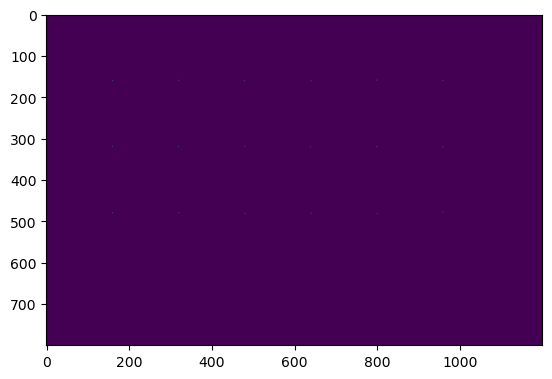

In [108]:
import storm_analysis.sa_utilities.hdf5_to_image as img_conv

tiffname = mlist_name.replace('.hdf5', '.tiff')
img2d = img_conv.render2DImage(mlist_name, scale = 4)
plt.imshow(img2d)

Tracks not found, using localizations.
.


(200, 300)

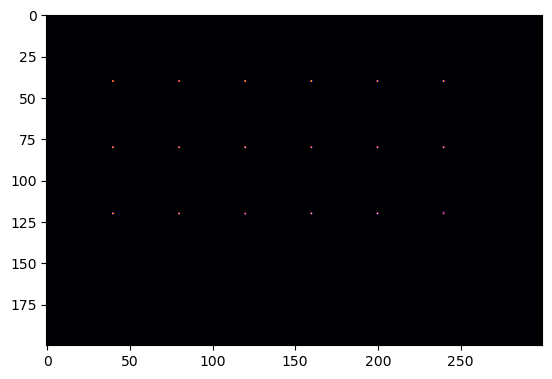

In [109]:
img3d = img_conv.render3DImage(mlist_name, z_edges= [-0.1, 0.1] , scale = 1)
plt.imshow(img3d[0], cmap='inferno')
img3d[0].shape


In [110]:
txt2csv(txtname)

Finished writing data\_validation_v4_zvalue_reversed_array_pxl2nm.csv


In [111]:
import pandas as pd

locs = pd.read_csv(txtname, sep=',', header=0, index_col=0)
locs.head(10)

frame  background  c1_background  c1_error  c1_height  c1_iterations  \
index                                                                         
0          0      18.921         16.954   342.328     47.177              6   
1          2      18.126         16.555   279.594     96.761              5   
2         20      15.510         14.758   323.636     70.719              6   
3         21      13.363         13.290   263.697    542.763             39   
4         21      14.332         14.889   279.088    119.162             11   
5         21      17.044         17.585   348.645    198.251             37   
6         22      14.951         15.130   359.900    123.765              6   
7         22      17.319         17.169   338.695     92.040              5   
8         22      17.482         17.008   340.006    133.124              9   
9         22      20.983         20.803   329.336    181.920              5   

       c1_significance   c1_sum     c1_x     c1_y  ...   height  iterations  \
index                                              ...                        
0               19.407   38.342  242.437   85.564  ...   47.177           6   
1               44.497   92.678  242.521   85.670  ...   96.761           5   
2               34.242   72.128  243.685  128.060  ...   70.719           6   
3               51.843  412.181   42.219   45.122  ...  542.763          39   
4               27.142   89.107   37.325  123.104  ...  119.162          11   
5               49.228  151.203  205.365  129.366  ...  198.251          37   
6               57.937  116.737   44.516   40.614  ...  123.765           6   
7               34.055   78.398  239.351   80.740  ...   92.040           5   
8               50.227  114.161   37.849   86.562  ...  133.124           9   
9               79.167  167.603   78.557   88.338  ...  181.920           5   

       significance      sum        x        y      z        xnm        ynm  \
index                                                                         
0            19.407   34.744  240.441   80.550 -2.261  25967.622   8699.415   
1            44.497   63.933  240.525   80.656 -2.071  25976.672   8710.874   
2            34.242   52.971  241.681  123.046 -1.803  26101.503  13288.985   
3            51.843  637.127   40.214   40.140 -2.831   4343.101   4335.112   
4            27.142   98.752   35.303  118.123 -2.352   3812.770  12757.321   
5            49.228  156.266  203.357  124.358 -2.326  21962.561  13430.693   
6            57.937   82.115   42.512   35.631 -2.094   4591.258   3848.172   
7            34.055   65.324  237.355   75.726 -2.214  25634.379   8178.458   
8            50.227   94.843   35.835   81.581 -2.209   3870.128   8810.699   
9            79.167  121.715   76.546   83.350 -2.125   8266.986   9001.828   

           znm  
index           
0     -244.169  
1     -223.634  
2     -194.729  
3     -305.699  
4     -253.967  
5     -251.179  
6     -226.198  
7     -239.109  
8     -238.600  
9     -229.551  

[10 rows x 77 columns]

Text(0, 0.5, 'z (um)')

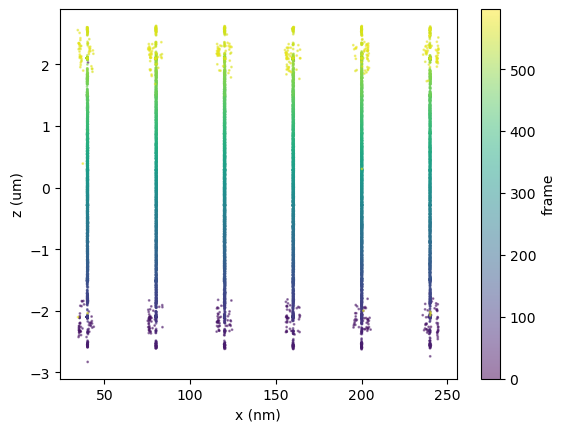

In [112]:
plt.scatter(locs['x'], locs['z'], c=locs['frame'], s=1, alpha=0.5)
plt.colorbar(label='frame')
plt.xlabel('x (nm)')
plt.ylabel('z (um)')

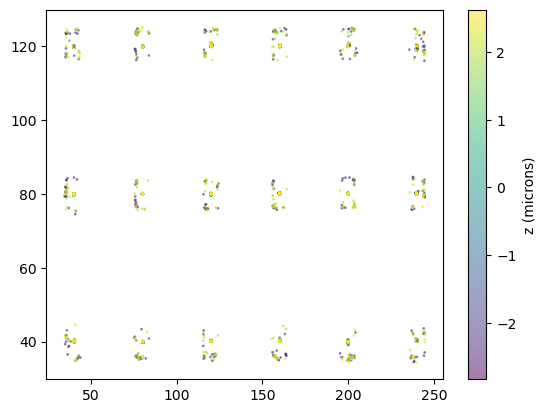

In [113]:
plt.scatter(locs['x'], locs['y'], c=locs['z'], s=1, alpha=0.5)
plt.colorbar(label='z (microns)')

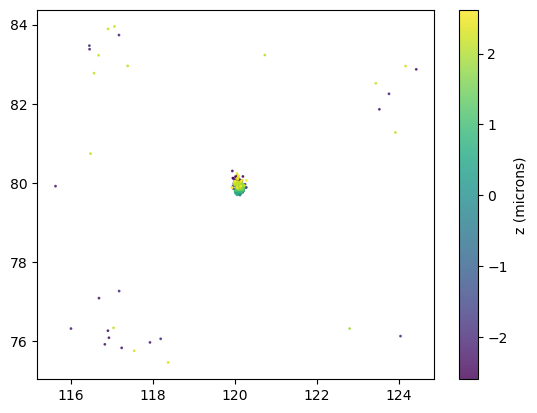

In [115]:
locs_bead = locs[(locs['x'] > 100) & (locs['x'] < 140) & (locs['y'] > 60) & (locs['y'] < 100)]
plt.scatter(locs_bead['x'], locs_bead['y'], c=locs_bead['z'], s=1, alpha=0.8)
plt.colorbar(label='z (microns)')

Text(0, 0.5, 'Z (nm)')

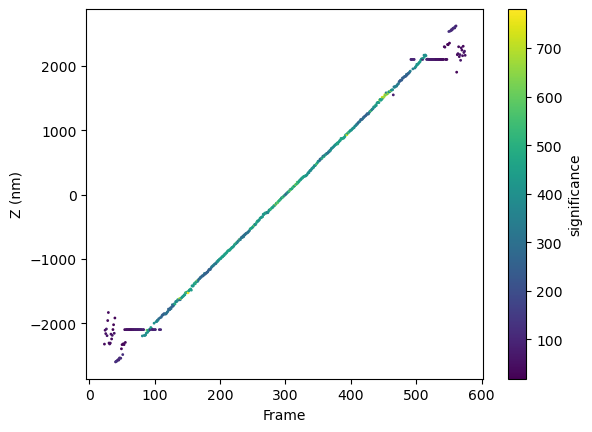

In [116]:
#locs_filter = locs[(locs['significance'] > 25) & (locs['height'] < 10000)]
locs_filter = locs_bead
z=locs_filter['z']* 1000 # convert to nm
color_var = 'significance'
plt.scatter(locs_filter['frame'], z, s=1, c=locs_filter[color_var], cmap='viridis')
colorbar = plt.colorbar(label=color_var)
plt.xlabel('Frame')
plt.ylabel('Z (nm)')
#locs_filter.plot.scatter(x='frame', y='z', c='significance', s=1, cmap='viridis')